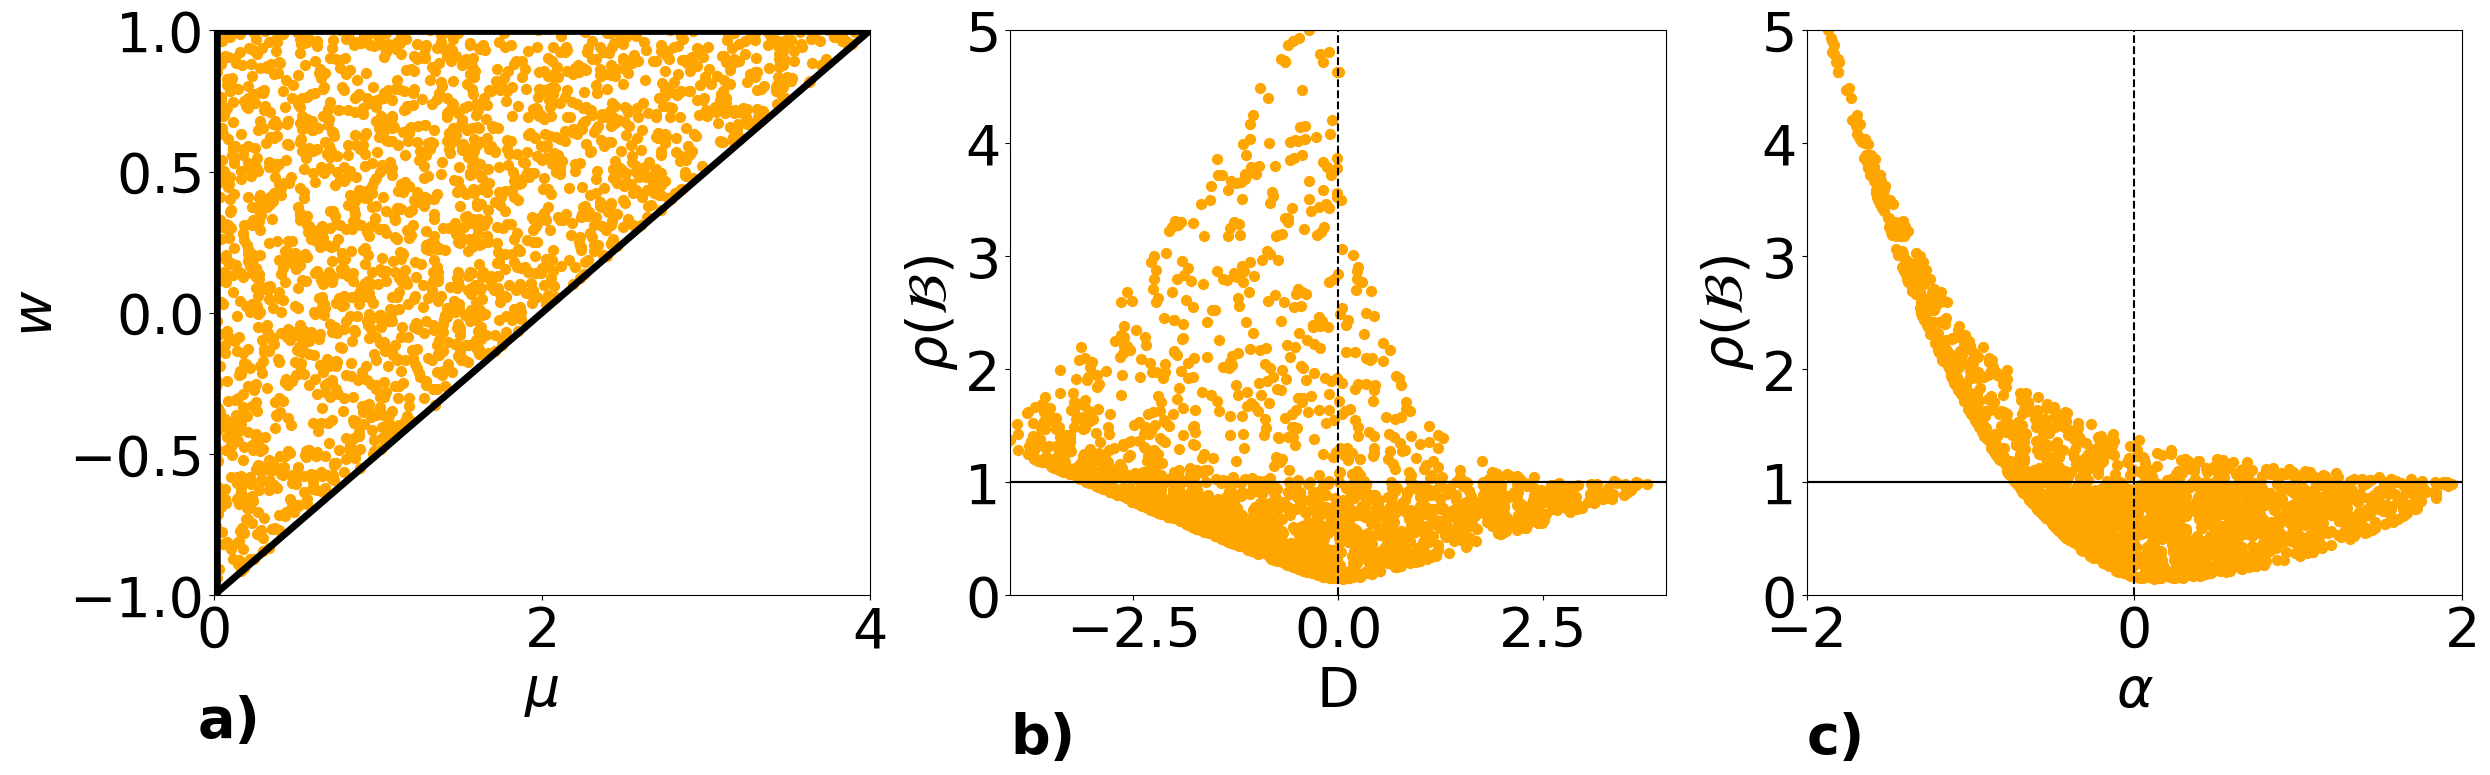

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 27 09:56:20 2024

@author: kostre
"""

import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

def fct_abs(c): # complex absolute value
    
    r=c.real
    i=c.imag
    
    return np.sqrt(r**2+i**2)

def fct_RhoA(mu, w):
    
    M1=np.array([[1+w-mu,-w],[1,0]])
    
    ev, ew=np.linalg.eig(M1)
    
    NormEv=np.zeros(len(ev))
    for i in range(len(ev)):
        NormEv[i]=fct_abs(ev[i])
    
    spectral_norm=np.max(NormEv)
    
    return spectral_norm


def fct_theta(mu, w):
    
    M=np.array([[ (1+w)**2-4*mu/2*(1+w)+2*(mu**2)/3+2*(mu/2)**2,  2*w*(2*(mu/2)-(1+w)),w**2],
            [(1+w)-mu,-w,0],
            [1,0,0]],
            )
    
    ev, ew=np.linalg.eig(M)
    
    NormEv=np.zeros(len(ev))
    for i in range(len(ev)):
        NormEv[i]=fct_abs(ev[i])
    
    spectral_norm=np.max(NormEv)
    
    return spectral_norm, NormEv

def fct_D(mu,w):
    
    D=(1+w-mu)**2-4*w
    
    return D


def fct_alpha(mu,w):
    
    
    return 1+w-mu

#%% calculate D and theta

# get all parameters from first-order stable region that satiqsfy the condition -1<w<1 and mu<2*(1+w)

w=np.linspace(-1,1,1000)
mu=np.linspace(0,4,1000)
FirstOrderStableRegion=[]
for i in range(len(w)):
    for j in range(len(mu)):
        if mu[j]<2*(1+w[i]):
            FirstOrderStableRegion.append([mu[j],w[i]])
        
# sample now D and theta for all these parameters

D=[]
Theta=[]
Alpha=[]
RhoA=[]
Mu=[]
W=[]
EV1=[]
EV2=[]
EV3=[]
sim=2000

for s in range(sim):
    # pick one first order stable region parameter
    r=np.random.randint(0,len(FirstOrderStableRegion))
    mu=FirstOrderStableRegion[r][0]
    w=FirstOrderStableRegion[r][1]
    D.append(fct_D(mu,w))
    radius, EVB=fct_theta(mu,w)
    EV1.append(EVB[0])
    EV2.append(EVB[1])
    EV3.append(EVB[2])
    Theta.append(radius)
    RhoA.append(fct_RhoA(mu,w))
    Alpha.append(fct_alpha(mu,w))
    Mu.append(mu)
    W.append(w)

#%%
def f(x):
    return (x-2)*0.5


X=np.linspace(0,4,100)
# Create a figure and axis for subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# Plot 1: Dampled
axs[0].axhline(y=1, color='black', linestyle='-')
axs[0].scatter(Mu, W, marker='o', color='orange', s=50)
axs[0].set_xlabel(r'$\mu$', fontsize=40)
axs[0].set_ylabel(r'$w$', fontsize=40)
axs[0].tick_params(axis='both', which='major', labelsize=40)
axs[0].set_xlim([0, 4])  # Set x-axis limits
axs[0].set_ylim([-1, 1])  # Set y-axis limits
axs[0].plot(X, f(X), color='black',  linestyle='-', linewidth=5)
axs[0].plot(X, np.ones(len(X)), color='black',  linestyle='-', linewidth=7)
axs[0].axvline(x=0, color='black',linewidth=9, linestyle='-')  # Add vertical line at x=1
axs[0].text(-0.1, -1.5, 'a)', fontsize=40, weight='bold')  # Add label "a)"


# Plot 1: D vs. Theta
axs[1].axhline(y=1, color='black', linestyle='-')
axs[1].scatter(D, Theta, marker='o', color='orange', s=50)
axs[1].set_xlabel('D', fontsize=40)
axs[1].set_ylabel(r'$\rho(\mathcal{B})$', fontsize=40)
axs[1].tick_params(axis='both', which='major', labelsize=40)
axs[1].axhline(y=1, color='black', linestyle='-')
axs[1].axvline(x=0, color='black', linestyle='--')  # Add vertical line at x=1
axs[1].set_xlim([-4, 4])  # Set x-axis limits
axs[1].set_ylim([0, 5])  # Set y-axis limits
axs[1].text(-4, -1.4, 'b)', fontsize=40, weight='bold')  # Add label "b)"


# Plot 2: Alpha vs. Theta
axs[2].axhline(y=1, color='black', linestyle='-')
axs[2].scatter(Alpha, Theta, marker='o', color='orange', s=50)
axs[2].set_xlabel(r'$\alpha$', fontsize=40)
axs[2].set_ylabel(r'$\rho(\mathcal{B})$', fontsize=40)
axs[2].tick_params(axis='both', which='major', labelsize=40)
axs[2].axhline(y=1, color='black', linestyle='-')
axs[2].axvline(x=0, color='black', linestyle='--')  # Add vertical line at x=1
axs[2].set_xlim([-2, 2])  # Set x-axis limits
axs[2].set_ylim([0, 5])  # Set y-axis limits
axs[2].text(-2, -1.4, 'c)', fontsize=40, weight='bold')  # Add label "c)"


# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig('Fig3.png')

# Show the combined plot
plt.show()


#%%


